## Alumno : Rubén Álvarez Mosquera

---
# **Clasificación Binaria de la superviviencia en el Titanic**

*Prefacio : Nuestra tarea consiste en predecir la supewrvivencia o no de un pasajero en el Titanic*

---

## Declaración de módulos
---

En primer lugar, vamos a importar algunos módulos comunes. 

También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

También agregaremos una librería (warnings) para evitar los molestos mensajes de advertencia(Futurewarnings).

In [2]:
# Se requiere Python ≥ 3.5
import sys
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np
import os

# Importamos la librería Pandas para administar Dataframes
import pandas as pd

# la línea que sigue, sólo en Colab ...
# %matplotlib inline
# Importamos librería MatPlotLib
import matplotlib as mpl
import matplotlib.pyplot as plt


# Importamos librería "Seaborn" para la visualización que es como un MatPlotLib con "esteriodes"
import seaborn as sns 


# Importa la librería que va a posibilitar evitar que salgan los molestos mensajes de advertencia
import warnings

Configuración de las Advertencias "Futurewarning"

In [3]:
# configuración para eviatar que aparezcan las advertencias "FutureWarnings"
warnings.filterwarnings("ignore", category=FutureWarning)

Configuración de las visualizaciones de "Seaborn"

In [4]:
# tamaño del texto en las etiquetas por defecto para Matplotlib
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)


# Configuramos visualizaciones con Seaborn
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

## Importacion de Datos
---

Definimos la función que importará los datos de un archivo CSV a un Dataframe de Pandas

In [25]:
INSURANCE_PATH = os.path.join("dataset");

def load_insurance_data(insurance_path):
    csv_path = os.path.join(insurance_path, "tested.csv")
    return pd.read_csv(csv_path)

Llamamos a la función de importación de datos y los importamos a la variable "insurance"

In [26]:
titanic = load_insurance_data(INSURANCE_PATH)

Comprobamos el estado de los Datos, mediante una revisión de las primeras filas

In [27]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
titanic_backup = titanic.copy()

## Revisamos el estado de los datos
---

Revisamos las columnas en general

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Comprobación del número de NaN por categoría

In [35]:
# De forma global
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

### "PassengerId" ------------------------------------------
*Número de identificación del pasajero*

In [30]:
titanic['PassengerId'].describe()

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64

In [31]:
titanic['PassengerId'].value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

- Es una variable categórica
- No con tiene NaN
- Debemos prescindir de ella para los cálculos de la predicción porque no aporta datos revelantes

In [32]:
# Eliminación de la columna "PassegerID"
titanic.drop(["PassengerId"],axis=1, inplace=True)

### "Survived" ------------------------------------------
*Si el pasajero sobrevivió al naufragio*

In [22]:
titanic['Survived'].describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [33]:
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64


- Es una variable binaria 0/1
- No contiene NaN
- Es la variable que buscaremos predecir con este dataset.
- No tenemos que realizar ninguan actuación sobre ella.

### "Pclass" ------------------------------------------
*Clase a la que pertenecía el pasajero*


In [23]:
titanic['Pclass'].describe()

count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [34]:
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

- Es una variable categórica con 3 valores
- No contiene NaN
- Deberemos normalizar las columnas categorias en tres columnas por cada una de las 3 clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

### "Name" ------------------------------------------
*Nombre y Apellidos*


In [36]:
titanic['Name'].describe()

count                  418
unique                 418
top       Kelly, Mr. James
freq                     1
Name: Name, dtype: object

- Es una variable categórica con valores únicos 
- No contiene NaN
- Deberemos eliminar la columna del dataset ya que no aporta datos al modelo de predicción

In [37]:
# Eliminación de la columna "Name"
titanic.drop(["Name"],axis=1, inplace=True)

### "Sex" ------------------------------------------
*Sexo*


In [38]:
titanic['Sex'].describe()

count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object

In [39]:
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

- Es una variable categórica con 2 valores únicos Male/Female
- No contiene NaN
- Deberemos normalizar las columnas categorias en dos columnas por cada una de las clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

### "Age" ------------------------------------------
*Edad*


In [40]:
titanic['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [43]:
titanic['Age'].isna().sum()

86

- Es una variable contínua
- Contiene 86 NaN
- Deberemos rellenar los NaN con la media de las edades

In [44]:
# Hallamos la media redondeada a años
media_age = round(titanic["Age"].mean(),0)
print("La media redondeada a años es: ", round(titanic["Age"].mean(),0))
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Age"]), :].index)
print("Lista de los índices con NaN : ", list(titanic.loc[pd.isna(titanic["Age"]), :].index))
# Cambiamos el valor de los índice para la columna añoas por la media
for x in lista_NaN_age:
    titanic.loc[x,'Age']=media_age

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'age' es de : ", titanic["Age"].isna().sum())

La media redondeada a años es:  30.0
Lista de los índices con NaN :  [10, 22, 29, 33, 36, 39, 41, 47, 54, 58, 65, 76, 83, 84, 85, 88, 91, 93, 102, 107, 108, 111, 116, 121, 124, 127, 132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191, 199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255, 256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290, 292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366, 380, 382, 384, 408, 410, 413, 416, 417]
Después de los cambios, el número de los NaN en la columna 'age' es de :  0


### "SibSp" ------------------------------------------
*Número de herman@s en el barco*


In [45]:
titanic['SibSp'].describe()

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [46]:
titanic['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [47]:
titanic['SibSp'].isna().sum()

0

- Es una variable discreta con 6 valores, representando el número de hermanos
- No contiene NaN
- No deberemos realizar ninguna operación con ella

### "Parch" ------------------------------------------
*Número de padres e hijos en el barco*


In [48]:
titanic['Parch'].describe()

count    418.000000
mean       0.392344
std        0.981429
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        9.000000
Name: Parch, dtype: float64

In [49]:
titanic['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [50]:
titanic['Parch'].isna().sum()

0

- Es una variable discreta con 8 valores, representando el número de padres e hijos
- No contiene NaN
- No deberemos realizar ninguna operación con ella

### "Ticket" ------------------------------------------
*Número de tícket del pasajero*


- Es una variable categórica con valores únicos 
- No contiene NaN
- Deberemos eliminar la columna del dataset ya que no aporta datos al modelo de predicción

In [51]:
# Eliminación de la columna "Name"
titanic.drop(["Ticket"],axis=1, inplace=True)

### "Fare" ------------------------------------------
*Precio pagado por el billete*


In [52]:
titanic['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [53]:
titanic['Fare'].isna().sum()

1

- Es una variable continua
- Contiene 1 NaN
- Deberemos rellenar el NaN con el valor de media

In [54]:
# Hallamos la media redondeada de la tarifa
media_fare = round(titanic["Fare"].mean(),6)
print("La media de la tarifa es: ", round(titanic["Fare"].mean(),6))
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Fare"]), :].index)
print("El índice con NaN es : ", list(titanic.loc[pd.isna(titanic["Fare"]), :].index))
# Cambiamos el valor NaN, para la columna "Fare" por la media
for x in lista_NaN_age:
    titanic.loc[x,'Fare']=media_fare

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'Fare'/tarifa es de : ", titanic["Fare"].isna().sum())

La media de la tarifa es:  35.627188
El índice con NaN es :  [152]
Después de los cambios, el número de los NaN en la columna 'Fare'/tarifa es de :  0


Podemos ver valores mínimos con "0.000000"

In [193]:
titanic["Fare"].value_counts()[0.000000]

2

In [194]:
# Hallamos la media redondeada de la tarifa
media_fare = round(titanic["Fare"].mean(),6)
print("La media de la tarifa es: ", round(titanic["Fare"].mean(),6))
# Localizamos el índice del valor"0.000.000"
lista_zero = titanic.index[titanic["Fare"] == 0.000000].tolist()
print("los índices de los valores '0.000000' de la comlumna 'Fare' son : ", lista_zero)
# Cambiamos el valor "0.000000", para la columna "Fare" por la media
for x in lista_zero:
    titanic.loc[x,'Fare']=media_fare

La media de la tarifa es:  35.627188
los índices de los valores '0.000000' de la comlumna 'Fare' son :  [266, 372]


### "Cabin" ------------------------------------------
*Identificador de camarote del pasajero*


In [55]:
# número total de valores en la columna "Cabin"
len(titanic["Cabin"])

418

In [56]:
# Distribución de los números
titanic["Cabin"].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [57]:
# Cantidad de NaN en la columna "Cabin"
titanic["Cabin"].isna().sum()

327

In [58]:
# Detalle de los valores únicos de la columna "Cabin"
titanic["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

- Es una variable categórica
- Contiene 327 NaN
- Deberemos normalizar las columnas categorias en dos columnas por cada una de las clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

Podemos observar que :
- el Total de valores = 418
- el total de NaN     = 327
- el total no-NaN     =  91

En este caso lo vamos a dividir entre cubiertas y Desconocido
- En el caso de las cubiertas designaremos las Letras : "A","B","C", etc...
- En el caso del Desconocido pondremos la letra "U" de Unknown

In [59]:
# Localizamos el índice del NaN
lista_NaN_age = list(titanic.loc[pd.isna(titanic["Cabin"]), :].index)
# Cambiamos el valor NaN, y ás si los hubiera para la columna "Cabin" por la letra "U"
for x in lista_NaN_age:
    titanic.loc[x,'Cabin']="U"
# Cambiamos el valor de la columna "Cabin" por el primer caracter 
for x in range(len(titanic["Cabin"])):
    titanic.loc[x,"Cabin"]= titanic.loc[x,"Cabin"][0]

#Revisamos resultados 
print("Después de los cambios, el número de los NaN en la columna 'Cabin'es de : ", titanic["Fare"].isna().sum())

Después de los cambios, el número de los NaN en la columna 'Cabin'es de :  0


In [60]:
# Revisamos como ha quedado distribuida la columna "Cabin"
titanic["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

### "Embarked" ------------------------------------------
*Puerto desde el que embarcó el pasajero*


In [63]:
titanic['Embarked'].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [64]:
titanic['Embarked'].isna().sum()

0

- Es una variable categórica
- No contiene NaN
- Deberemos normalizar las columnas categorias en dos columnas por cada una de las clases
- Eso lo haremos más adelante con la herramienta OneHotEncoder

---

## Revisión y tratamiento de las columnas categorizadas : Sex, Cabin, Embarked, Pclass
---


Revisaremos las tres categorías, agregando la columna a una variable que usaremos posteriormente, y revisaremos el tipo de las categorías y sus valores

### Sex

In [65]:
# agregamos la columna a una variable
cat_sexo = titanic[ ["Sex"] ]

# Revisamos el contenido de la columna
titanic["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

### Cabin

In [66]:
# agregamos la columna a una variable
cat_cabin = titanic[ ["Cabin"] ]

# Revisamos el contenido de la columna
titanic["Cabin"].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

### Embarked

In [67]:
# agregamos la columna a una variable
cat_embar = titanic[ ["Embarked"] ]

# Revisamos el contenido de la columna
titanic["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

### Embarked

In [68]:
# agregamos la columna a una variable
cat_pclass = titanic[ ["Pclass"] ]

# Revisamos el contenido de la columna
titanic["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Podemos observar que son columnas categarizadas, que para el entrenamiento no pueden existir, por lo que necesitamos pasar de columnas categorizadas a otro tipo de expresión como por ejemplo a la división de las categorías en nuevas columnas y poniendo un 0 cuando no se cumpla la condición de la categoría y un "1" cuando sí.

De esta forma no estaremos añadiendo información al Dataset, y nos permitirá el estudio y el entrenamiento del modelo.

## Uso de OneHotEncoder para la gestión de las cloumnas categorizadas
---

OneHotencoder nos permitirá pasar las categorías a diferentes columnas por valor de categoría y agregarle "0" y "1" en cada caso.

Ante de nada realizaremos un Backup de los datos por si necesitáramos volver al estado anterior

In [70]:
# Haremos una copia para ver los resultados 
titanic_backup = titanic.copy()

Crearemos una nueva variable con el Dataframe Normalizado llamdo "titanic_norm"

In [71]:
titanic_norm = titanic.copy()

Llamamos a la librería "OneHotEncoder" de Sklearn

In [72]:
# Declaramos la librería OneHotEncoder de sklearn
from sklearn.preprocessing import OneHotEncoder

Usamos el método con cada una de las columnas categóricas, empezando por


### SEXO

In [73]:
sexo_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
sexo_cat_1hot = sexo_encoder.fit_transform(cat_sexo)

sexo_cat_1hot

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [74]:
# Aquí tendremos los nombre de las categorías
sexo_encoder.categories_

[array(['female', 'male'], dtype=object)]

In [75]:
# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(sexo_cat_1hot, columns=[cat for cat in sexo_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Sex","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    object 
 7   Embarked  418 non-null    object 
 8   female    418 non-null    float64
 9   male      418 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 32.8+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,0,3,34.5,0,0,7.8292,U,Q,0.0,1.0
1,1,3,47.0,1,0,7.0000,U,S,1.0,0.0
2,0,2,62.0,0,0,9.6875,U,Q,0.0,1.0
3,0,3,27.0,0,0,8.6625,U,S,0.0,1.0
4,1,3,22.0,1,1,12.2875,U,S,1.0,0.0


### CABIN

In [76]:
cabin_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
cabin_cat_1hot = cabin_encoder.fit_transform(cat_cabin)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(cabin_cat_1hot, columns=[cat for cat in cabin_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Cabin","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   female    418 non-null    float64
 8   male      418 non-null    float64
 9   A         418 non-null    float64
 10  B         418 non-null    float64
 11  C         418 non-null    float64
 12  D         418 non-null    float64
 13  E         418 non-null    float64
 14  F         418 non-null    float64
 15  G         418 non-null    float64
 16  U         418 non-null    float64
dtypes: float64(12), int64(4), object(1)
memory usage: 55.6+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,A,B,C,D,E,F,G,U
0,0,3,34.5,0,0,7.8292,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3,47.0,1,0,7.0000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,3,27.0,0,0,8.6625,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [77]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={"A":"Cabin A"});
titanic_norm=titanic_norm.rename(columns={"B":"Cabin B"});
titanic_norm=titanic_norm.rename(columns={"C":"Cabin C"});
titanic_norm=titanic_norm.rename(columns={"D":"Cabin D"});
titanic_norm=titanic_norm.rename(columns={"E":"Cabin E"});
titanic_norm=titanic_norm.rename(columns={"F":"Cabin F"});
titanic_norm=titanic_norm.rename(columns={"G":"Cabin G"});
titanic_norm=titanic_norm.rename(columns={"U":"Cabin U"});

# Revisamos cambios 
titanic_norm.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U
0,0,3,34.5,0,0,7.8292,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3,47.0,1,0,7.0000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,Q,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,3,27.0,0,0,8.6625,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### EMBARKED

In [78]:
embar_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
embar_cat_1hot = embar_encoder.fit_transform(cat_embar)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(embar_cat_1hot, columns=[cat for cat in embar_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Embarked","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   female    418 non-null    float64
 7   male      418 non-null    float64
 8   Cabin A   418 non-null    float64
 9   Cabin B   418 non-null    float64
 10  Cabin C   418 non-null    float64
 11  Cabin D   418 non-null    float64
 12  Cabin E   418 non-null    float64
 13  Cabin F   418 non-null    float64
 14  Cabin G   418 non-null    float64
 15  Cabin U   418 non-null    float64
 16  C         418 non-null    float64
 17  Q         418 non-null    float64
 18  S         418 non-null    float64
dtypes: float64(15), int64(4)
memory usage: 62.2 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U,C,Q,S
0,0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={"C":"Embarked C"});
titanic_norm=titanic_norm.rename(columns={"Q":"Embarked Q"});
titanic_norm=titanic_norm.rename(columns={"S":"Embarked S"});

# Revisamos cambios 
titanic_norm.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S
0,0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### Pclass

In [80]:
pclass_encoder =OneHotEncoder(sparse=False)
# para la categoria Sexo (male/female)
pclass_cat_1hot = pclass_encoder.fit_transform(cat_pclass)

# Ahora sustituiremos la columna Sexo , por las de OneHotEncoder
titanic_norm.reset_index(drop=False, inplace=True)
titanic_norm=titanic_norm.join(pd.DataFrame(pclass_cat_1hot, columns=[cat for cat in pclass_encoder.categories_[0]]))
# Borraremos la columna categorizada, así como el index que se añadió al realizar el join 
titanic_norm=titanic_norm.drop(["Pclass","index"], axis=1)
# Mostramos el resultado
titanic_norm.info()
titanic_norm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   female      418 non-null    float64
 6   male        418 non-null    float64
 7   Cabin A     418 non-null    float64
 8   Cabin B     418 non-null    float64
 9   Cabin C     418 non-null    float64
 10  Cabin D     418 non-null    float64
 11  Cabin E     418 non-null    float64
 12  Cabin F     418 non-null    float64
 13  Cabin G     418 non-null    float64
 14  Cabin U     418 non-null    float64
 15  Embarked C  418 non-null    float64
 16  Embarked Q  418 non-null    float64
 17  Embarked S  418 non-null    float64
 18  1           418 non-null    float64
 19  2           418 non-null    f

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,1,2,3
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [81]:
# Cambiamos el nombre d elas columnas para entenderlo mejor
titanic_norm=titanic_norm.rename(columns={1:"FirstClass"});
titanic_norm=titanic_norm.rename(columns={2:"SecondClass"});
titanic_norm=titanic_norm.rename(columns={3:"ThirdClass"});

# Revisamos cambios 
titanic_norm.head()

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,FirstClass,SecondClass,ThirdClass
0,0,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


---
---
---

## Estudio numérico de la correlación entre los datos para obtener información relevante
---

### Revisión de los histogramas de las columnas
---

Realizamos una visualización de los histogramas de los datos, que representan el número de veces que un valor aparece, representando la distribución de los casos por categoría para tener una idea de su cantidad, dispersión ,etc...

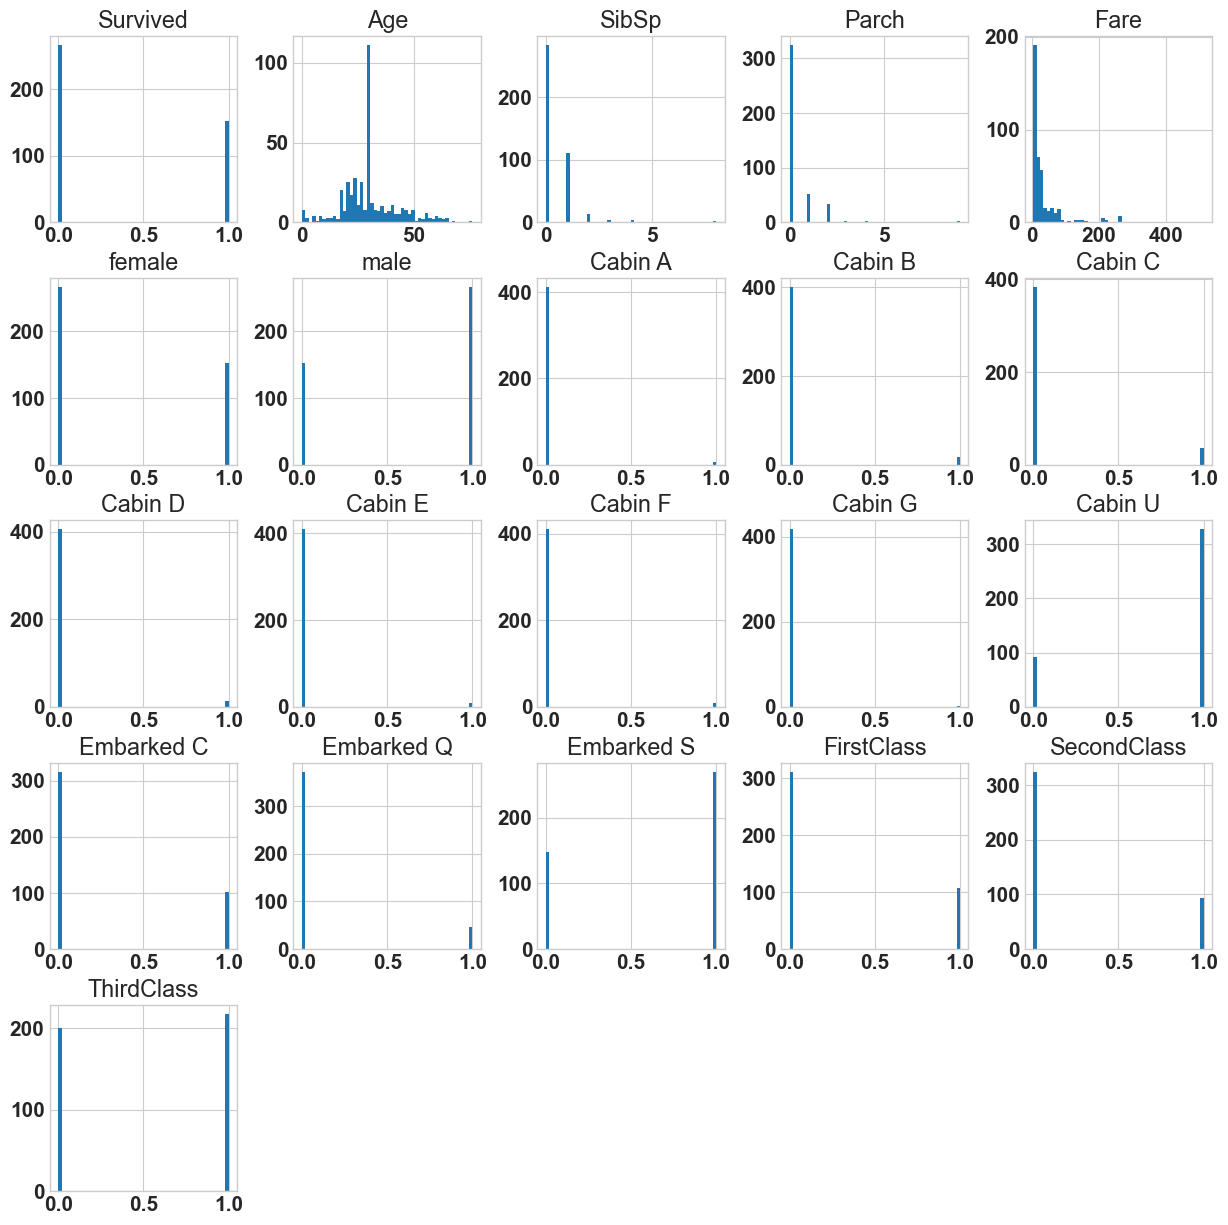

In [225]:
titanic_norm.hist(bins=50, figsize =(15,15))
plt.show()

Los histogramas tienen un buen comportamiento con valores discretas, pero no tanto con las categóricas binarias/booleanas, que apenas nos arrojan datos, a parte de su distribución por categorías

De todas formas, podemos ver que:
- Edad : Hay una gran concentración de muestras en edades de 18 a 20 años
- BMI(Índice de Masa Corporal) : Tiene una dispersión normal (Campana de Gauss)
- Hijos : Existen más concentración de muestras cuantos menos hijos, siendo "0" la mayor de ellas
- Cargos : Hay una gran concentración de muestras en las más bajas hasta 15.000
- Sexo : Igual número (aproximado) de hombre y mujeres
- Fumadores : Mucha más concentración de NO fumadores ( casi tres veces más )
- Región : Aproximadamente numero igual de muestras en cada region

# Buscando correlaciones

Aquí nos damos cuenta de la necesidad de la normalización del modelo para que las correlaciones puedan ser medidas

In [229]:
corr_matrix = titanic_norm.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
female         1.000000
Fare           0.189258
Parch          0.159120
FirstClass     0.126389
Embarked Q     0.115574
Cabin C        0.112625
SibSp          0.099943
Cabin G        0.064781
Cabin B        0.060134
Embarked C     0.033684
Cabin E        0.024919
Cabin A        0.017617
Cabin D        0.007813
Cabin F        0.003300
Age            0.000662
SecondClass   -0.045655
ThirdClass    -0.072405
Embarked S    -0.105883
Cabin U       -0.131464
male          -1.000000
Name: Survived, dtype: float64

In [230]:
corr_matrix

,Survived,Age,SibSp,Parch,Fare,female,male,Cabin A,Cabin B,Cabin C,...,Cabin E,Cabin F,Cabin G,Cabin U,Embarked C,Embarked Q,Embarked S,FirstClass,SecondClass,ThirdClass
Survived,1.000000,0.000662,0.099943,0.159120,0.189258,1.000000,-1.000000,0.017617,0.060134,0.112625,...,0.024919,0.003300,0.064781,-0.131464,0.033684,0.115574,-0.105883,0.126389,-0.045655,-0.072405
Age,0.000662,1.000000,-0.078870,-0.044980,0.331003,0.000662,-0.000662,0.132197,0.169123,0.275761,...,0.082349,-0.065350,-0.113372,-0.360502,0.161724,-0.015119,-0.135353,0.454726,-0.058211,-0.348797
SibSp,0.099943,-0.078870,1.000000,0.306895,0.170128,0.099943,-0.099943,-0.023554,0.051938,0.099729,...,-0.000484,-0.030780,0.030214,-0.073067,-0.016365,-0.098824,0.079367,0.019166,-0.042418,0.018573
Parch,0.159120,-0.044980,0.306895,1.000000,0.229003,0.159120,-0.159120,-0.014196,0.107455,-0.024072,...,0.041513,0.015341,0.030356,-0.037237,-0.005791,-0.132948,0.092201,-0.005485,-0.026335,0.026719
Fare,0.189258,0.331003,0.170128,0.229003,1.000000,0.189258,-0.189258,0.020890,0.425431,0.462438,...,0.130783,-0.046935,-0.016785,-0.563299,0.310609,-0.156767,-0.176375,0.622663,-0.130525,-0.435303
female,1.000000,0.000662,0.099943,0.159120,0.189258,1.000000,-1.000000,0.017617,0.060134,0.112625,...,0.024919,0.003300,0.064781,-0.131464,0.033684,0.115574,-0.105883,0.126389,-0.045655,-0.072405
male,-1.000000,-0.000662,-0.099943,-0.159120,-0.189258,-1.000000,1.000000,-0.017617,-0.060134,-0.112625,...,-0.024919,-0.003300,-0.064781,0.131464,-0.033684,-0.115574,0.105883,-0.126389,0.045655,0.072405
Cabin A,0.017617,0.132197,-0.023554,-0.014196,0.020890,0.017617,-0.017617,1.000000,-0.027684,-0.039451,...,-0.019359,-0.018230,-0.006391,-0.247390,0.099484,-0.045892,-0.059316,0.222493,-0.069812,-0.136252
Cabin B,0.060134,0.169123,0.051938,0.107455,0.425431,0.060134,-0.060134,-0.027684,1.000000,-0.064127,...,-0.031468,-0.029632,-0.010388,-0.402123,0.153868,-0.074596,-0.089376,0.361655,-0.113477,-0.221472
Cabin C,0.112625,0.275761,0.099729,-0.024072,0.462438,0.112625,-0.112625,-0.039451,-0.064127,1.000000,...,-0.044843,-0.042227,-0.014804,-0.573044,0.230440,-0.078703,-0.155459,0.515375,-0.161709,-0.315608


<AxesSubplot:>

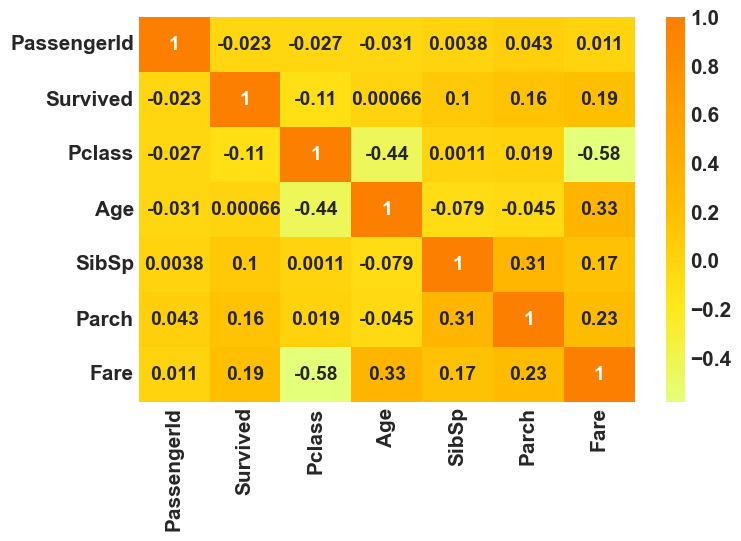

In [231]:
plt.rcParams['font.size'] =14
corr = titanic.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

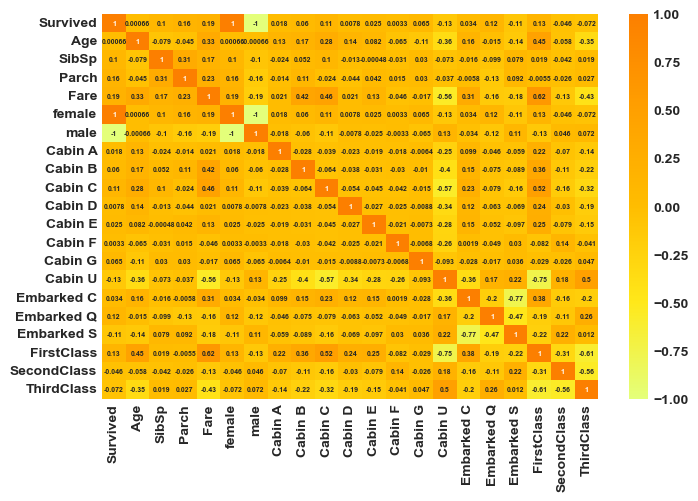

In [84]:
corr_norm = titanic_norm.corr()

# Reduciremos el tamaño de fuente para este gráfico (y lo volveremos a dejar como estaba) por el tamaño de celdas
# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
plt.rcParams['font.size'] =5

sns.heatmap(corr_norm, cmap = 'Wistia', annot= True)

# Volvemos a dejar el tamaño de letras por defecto
mpl.rc('axes',  labelsize=15)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
plt.rcParams['font.size'] =14

## Conclusiones preliminares:
- Podemos observar una corelación directa-100% entre Supervivientes y el Sexo.
- Según los datos que tenemos: Todas las mujeres sobrevivieron, mientras todos los hombre perecieron

- Para las otra categorías de variables, aparecen débiles correlaciones positivas, entre las que podemos detacar:
  - 0.10 Pasajeros con un mayor número de herman@s a bordo 
  - 0.11 Pasajeros de loS camarotes de la cubierta "C"
  - 0.13 Pasajeros de Primera Clase
  - 0.16 Pasajeros con un mayor número de padres e hijos a bordo
  - 0.19 Mayor precio pagado por el billete

---
---
---